<a href="https://colab.research.google.com/github/itsmeritika/Machine_learning_7_day_training/blob/main/Decision_Trees_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('churn.csv')


In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
df.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Subscription Type,object
Contract Length,object
Total Spend,int64


In [ ]:
X = df.drop(columns=['Churn'])
y =df['Churn']

In [ ]:
X.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20
2,3,47,Male,27,10,2,29,Premium,Annual,757,21
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,5,53,Female,58,24,9,2,Standard,Annual,533,18


In [ ]:
y.head()

,Churn
0,1
1,0
2,0
3,0
4,0


In [ ]:
X =X.drop(columns=['CustomerID'])

In [ ]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,Female,25,14,4,27,Basic,Monthly,598,9
1,41,Female,28,28,7,13,Standard,Monthly,584,20
2,47,Male,27,10,2,29,Premium,Annual,757,21
3,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,53,Female,58,24,9,2,Standard,Annual,533,18


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['Gender', 'Subscription Type','Contract Length']
for column in columns:
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])


In [ ]:
X_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
13468,56,0,42,11,0,10,1,2,793,15
20118,54,1,60,5,3,9,2,2,610,24
48411,31,1,12,2,9,7,0,0,222,30
42125,33,0,22,17,5,25,1,1,648,20
55119,39,0,28,30,2,25,1,1,983,22


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)


In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
accuracies

array([0.99912621, 0.9976699 , 0.99854369, 0.99815534, 0.99912613])

In [ ]:
accuracies.mean()

0.9985242548762866

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6785    8]
 [   6 6076]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [ ]:
from sklearn .metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9989126213592233

[Text(0.4357336956521739, 0.9642857142857143, 'x[5] <= -0.185\nentropy = 0.998\nsamples = 51499\nvalue = [27088, 24411]'),
 Text(0.14782608695652175, 0.8928571428571429, 'x[3] <= -1.086\nentropy = 0.478\nsamples = 20107\nvalue = [18040, 2067]'),
 Text(0.29177989130434784, 0.9285714285714286, 'True  '),
 Text(0.1391304347826087, 0.8214285714285714, 'x[0] <= 0.613\nentropy = 0.997\nsamples = 4410\nvalue = [2343, 2067]'),
 Text(0.0782608695652174, 0.75, 'x[3] <= -1.426\nentropy = 0.632\nsamples = 2363\nvalue = [1987, 376]'),
 Text(0.043478260869565216, 0.6785714285714286, 'x[7] <= -0.601\nentropy = 0.912\nsamples = 1060\nvalue = [713, 347]'),
 Text(0.017391304347826087, 0.6071428571428571, 'x[8] <= -0.916\nentropy = 0.955\nsamples = 503\nvalue = [189, 314]'),
 Text(0.008695652173913044, 0.5357142857142857, 'entropy = 0.0\nsamples = 181\nvalue = [0, 181]'),
 Text(0.02608695652173913, 0.5357142857142857, 'x[2] <= -1.196\nentropy = 0.978\nsamples = 322\nvalue = [189.0, 133.0]'),
 Text(0.0173

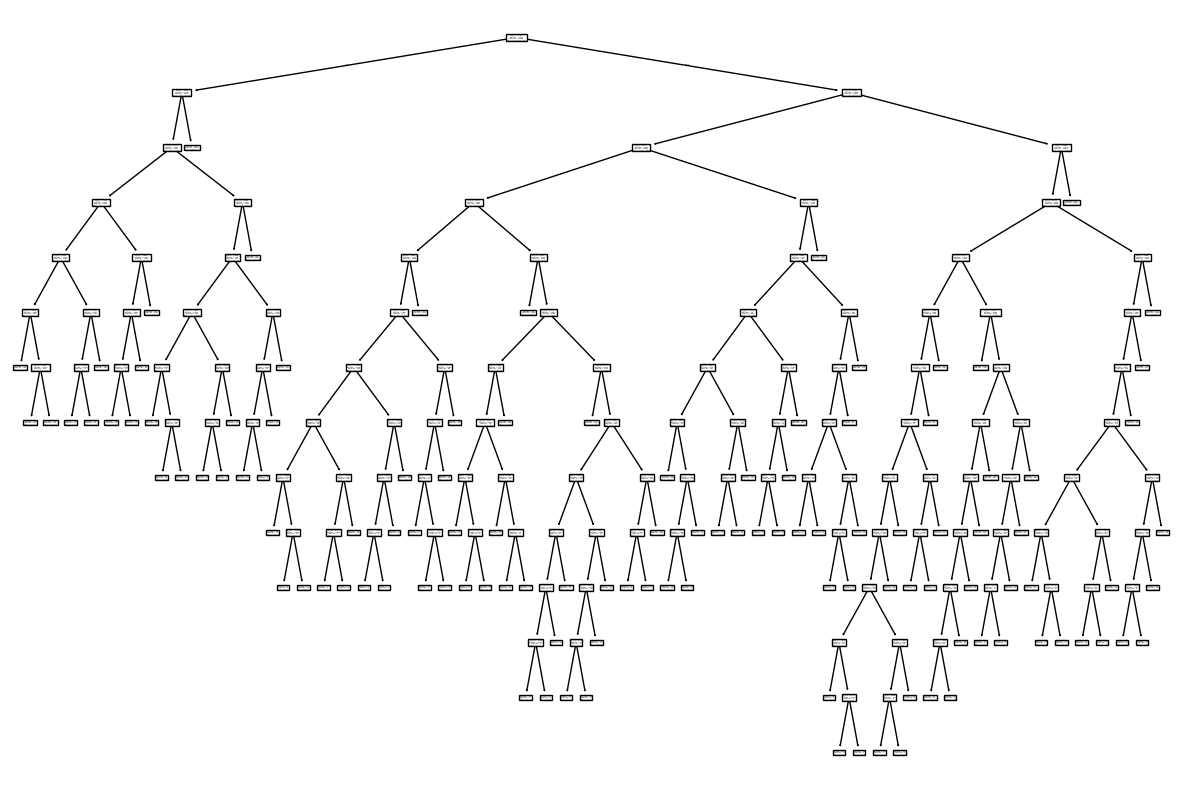

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(classifier)



['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']
['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']


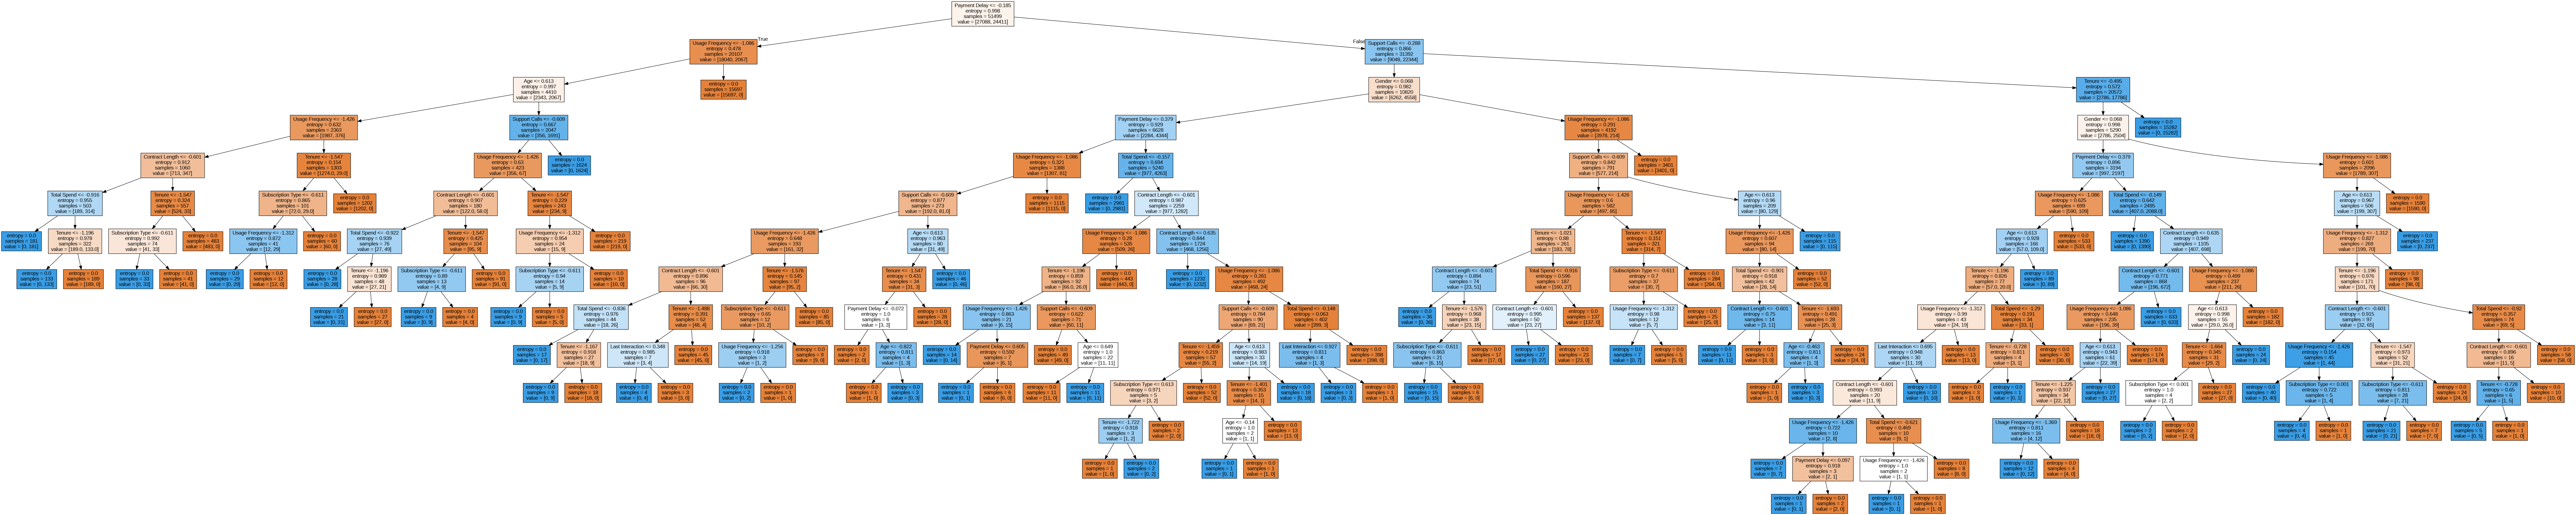

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
print(features)
features.remove('Churn')
features.remove('CustomerID')
print(features)


dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)


In [ ]:
print(accuracies)

[0.99912621 0.9976699  0.99854369 0.99815534 0.99912613]


In [ ]:
print(accuracies.mean())

0.9985242548762866


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6785    8]
 [   6 6076]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6785    8]
 [   6 6076]]


In [ ]:
features = list(df.columns)
features.remove('Churn')
features.remove('CustomerID')

In [ ]:
features_importance = pd.Series(clf.feature_importances_, index=features).sort_values()
print(features_importance)

Subscription Type    0.003707
Last Interaction     0.006673
Contract Length      0.042449
Total Spend          0.046886
Age                  0.047240
Gender               0.077615
Usage Frequency      0.107179
Tenure               0.115956
Support Calls        0.156230
Payment Delay        0.396064
dtype: float64


In [ ]:
features_importance = pd.Series(clf.feature_importances_,index=features).sort_values()
print(features_importance)

Subscription Type    0.003707
Last Interaction     0.006673
Contract Length      0.042449
Total Spend          0.046886
Age                  0.047240
Gender               0.077615
Usage Frequency      0.107179
Tenure               0.115956
Support Calls        0.156230
Payment Delay        0.396064
dtype: float64
